## xApps<br>
**KPM monitor xApp**<br><br>
**RC monitor xApp**<br><br>
**RC control xApp**<br><br>
**(MAC + RLC + PDCP + GTP) monitor xApp**<br><br>




## DB:<br>

GTP_NGUT &nbsp;&nbsp;   KPM_MeasRecord&nbsp; &nbsp; PDCP_bearer &nbsp; &nbsp;   	SLICE         
KPM_LabelInfo&nbsp;   &nbsp;	MAC_UE &nbsp; &nbsp;        	RLC_bearer &nbsp;&nbsp;     	UE_SLICE




## Tables<br>
**GTP_NGUT|8938**<br><br>
KPM_MeasRecord|0<br><br>
**PDCP_bearer|28783**<br><br>
SLICE|0<br><br>
KPM_LabelInfo|0<br><br>
**MAC_UE|20321**<br><br>
**RLC_bearer|8931**<br><br>
UE_SLICE|0<br><br>

In [105]:
%%pyspark
df = spark.read.load('abfss://files@datalakefv41bzh.dfs.core.windows.net/data/GTP_NGUT.csv', format='csv'
## If header exists uncomment line below
, header=True
)
display(df.limit(10))

StatementMeta(sparkfv41bzh, 1, 101, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 8b4f7df3-cc2e-4d1f-84e2-edbcb8139b51)

In [106]:
df.printSchema()


StatementMeta(sparkfv41bzh, 1, 102, Finished, Available, Finished)

root
 |-- tstamp: string (nullable = true)
 |-- ngran_node: string (nullable = true)
 |-- mcc: string (nullable = true)
 |-- mnc: string (nullable = true)
 |-- mnc_digit_len: string (nullable = true)
 |-- nb_id: string (nullable = true)
 |-- cu_du_id: string (nullable = true)
 |-- teidgnb: string (nullable = true)
 |-- rnti: string (nullable = true)
 |-- qfi: string (nullable = true)
 |-- teidupf: string (nullable = true)



In [107]:
# ngran_node = identifier for ngRAN node= 2
# mcc= country of mobile network= 505
# mnc = mobile network operator= 1
# mnc_digit_len= length of mnc= 2
# nb_id= node id -- base station= 1
# cu_du_id= centralized unit or distributed unit = null


StatementMeta(sparkfv41bzh, 1, 103, Finished, Available, Finished)

In [108]:
# teidgnb= Tunnel Endpoint Identifier (TEID) for gNB, idnetfying GTP tunnels for user data = 9
# rnti= radio network temporary identifier = 9
# qfi= QoS flow identifier, defines quality of service flow = 9
# teidupf= 	Tunnel Endpoint Identifier (TEID) for User Plane Function (UPF) = 9

StatementMeta(sparkfv41bzh, 1, 104, Finished, Available, Finished)

In [109]:
df.select("teidupf").distinct().count()


StatementMeta(sparkfv41bzh, 1, 105, Finished, Available, Finished)

9

In [110]:
df.schema

StatementMeta(sparkfv41bzh, 1, 106, Finished, Available, Finished)

StructType([StructField('tstamp', StringType(), True), StructField('ngran_node', StringType(), True), StructField('mcc', StringType(), True), StructField('mnc', StringType(), True), StructField('mnc_digit_len', StringType(), True), StructField('nb_id', StringType(), True), StructField('cu_du_id', StringType(), True), StructField('teidgnb', StringType(), True), StructField('rnti', StringType(), True), StructField('qfi', StringType(), True), StructField('teidupf', StringType(), True)])

In [111]:
df.count()



StatementMeta(sparkfv41bzh, 1, 107, Finished, Available, Finished)

8938

In [112]:
df.describe().show()


StatementMeta(sparkfv41bzh, 1, 108, Finished, Available, Finished)

+-------+--------------------+----------+-----+----+-------------+-----+--------+-----------------+-----------------+------------------+-----------------+
|summary|              tstamp|ngran_node|  mcc| mnc|mnc_digit_len|nb_id|cu_du_id|          teidgnb|             rnti|               qfi|          teidupf|
+-------+--------------------+----------+-----+----+-------------+-----+--------+-----------------+-----------------+------------------+-----------------+
|  count|                8938|      8938| 8938|8938|         8938| 8938|    8938|             8938|             8938|              8938|             8938|
|   mean|1.738422079841274E15|       2.0|505.0| 1.0|          2.0|  1.0|    null|320.0482210785411|620.4099351085254|121.12049675542627|138.0355784291788|
| stddev|   1849516.878097519|       0.0|  0.0| 0.0|          0.0|  0.0|    null|310.5652864692909|321.4208111010509| 72.85602641269605|85.07625648621557|
|    min|    1738422077014901|         2|  505|   1|            2|    

In [113]:
#  Distribution of QFI Values

df.groupBy("qfi").count().orderBy("count").show()


StatementMeta(sparkfv41bzh, 1, 109, Finished, Available, Finished)

+---+-----+
|qfi|count|
+---+-----+
|120|  979|
|174|  991|
|  1|  991|
|146|  993|
| 35|  993|
| 89|  993|
|205|  999|
|235|  999|
| 84| 1000|
+---+-----+



In [114]:
# Distribution of (TEID) for gNB
df.groupBy("teidgnb").count().orderBy("count").show()


StatementMeta(sparkfv41bzh, 1, 110, Finished, Available, Finished)

+-------+-----+
|teidgnb|count|
+-------+-----+
|    314|  979|
|    722|  991|
|    135|  991|
|     98|  993|
|    303|  993|
|    165|  993|
|     21|  999|
|    119|  999|
|   1002| 1000|
+-------+-----+



In [115]:
# Distribution of radio network temporary identifier
df.groupBy("rnti").count().orderBy("count").show()

StatementMeta(sparkfv41bzh, 1, 111, Finished, Available, Finished)

+----+-----+
|rnti|count|
+----+-----+
| 770|  979|
|  69|  991|
| 510|  991|
| 991|  993|
| 950|  993|
| 637|  993|
| 327|  999|
|1022|  999|
| 310| 1000|
+----+-----+



In [116]:
# Distribution of (TEID) for User Plane Function (UPF)
df.groupBy("teidupf").count().orderBy("count").show()

StatementMeta(sparkfv41bzh, 1, 112, Finished, Available, Finished)

+-------+-----+
|teidupf|count|
+-------+-----+
|     87|  979|
|    166|  991|
|     20|  991|
|    159|  993|
|     56|  993|
|    253|  993|
|    245|  999|
|    216|  999|
|     39| 1000|
+-------+-----+



In [117]:
from pyspark.sql.functions import from_unixtime, col

df_gtp = df_gtp.withColumn("timestamp", from_unixtime(col("tstamp").cast("long") / 1000000))

df_gtp.show(truncate=False)


StatementMeta(sparkfv41bzh, 1, 113, Finished, Available, Finished)

+----------------+----------+---+---+-------------+-----+--------+-------+----+---+-------+-------------------+
|tstamp          |ngran_node|mcc|mnc|mnc_digit_len|nb_id|cu_du_id|teidgnb|rnti|qfi|teidupf|timestamp          |
+----------------+----------+---+---+-------------+-----+--------+-------+----+---+-------+-------------------+
|1738422077014901|2         |505|1  |2            |1    |(null)  |119    |327 |235|245    |2025-02-01 15:01:17|
|1738422077014901|2         |505|1  |2            |1    |(null)  |21     |1022|205|216    |2025-02-01 15:01:17|
|1738422077015886|2         |505|1  |2            |1    |(null)  |119    |327 |235|245    |2025-02-01 15:01:17|
|1738422077015886|2         |505|1  |2            |1    |(null)  |21     |1022|205|216    |2025-02-01 15:01:17|
|1738422077016901|2         |505|1  |2            |1    |(null)  |119    |327 |235|245    |2025-02-01 15:01:17|
|1738422077016901|2         |505|1  |2            |1    |(null)  |21     |1022|205|216    |2025-02-01 15

StatementMeta(sparkfv41bzh, 1, 114, Finished, Available, Finished)

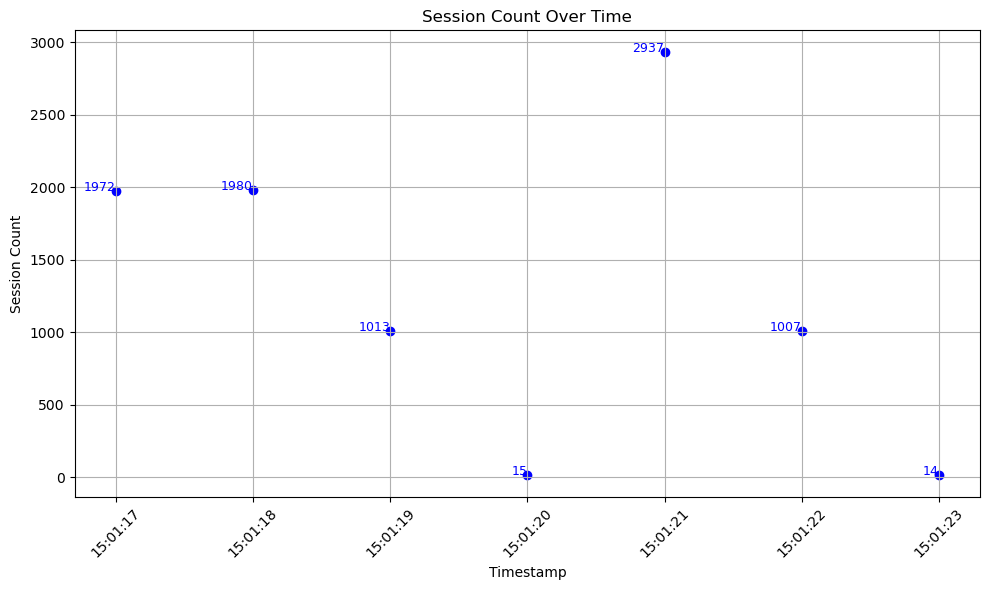

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Aggregate count by timestamp (grouping by 'timestamp' column)
df_gtp_aggregated = df_gtp.groupBy("timestamp").agg(F.count("*").alias("count"))

pdf = df_gtp_aggregated.toPandas()

pdf["timestamp"] = pd.to_datetime(pdf["timestamp"])

plt.figure(figsize=(10, 6))
plt.scatter(pdf["timestamp"], pdf["count"], color='b', marker='o')

# Annotating each point with its count value
for i, row in pdf.iterrows():
    plt.text(row["timestamp"], row["count"], str(row["count"]), fontsize=9, ha='right', color='blue')

plt.xlabel("Timestamp")
plt.ylabel("Session Count")
plt.title("Session Count Over Time")

plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()


In [119]:

from pyspark.sql.functions import col

dftest = df.withColumn('rnti', col('rnti').cast('double')) \
       .withColumn('teidgnb', col('teidgnb').cast('double'))

# Calculate the correlation between rnti and teidgnb
correlation = dftest.stat.corr('rnti', 'teidgnb')
print(f"Correlation between rnti and teidgnb: {correlation}")


StatementMeta(sparkfv41bzh, 1, 115, Finished, Available, Finished)

Correlation between rnti and teidgnb: -0.679008914518616


A correlation of -0.679 suggests a moderate negative relationship between rnti and teidgnb. This means that as the rnti (radio network temporary identifier) increases, the teidgnb (Tunnel Endpoint Identifier for gNB) tends to decrease, but the relationship is not perfectly linear.

The negative correlation could indicate that, under certain conditions, when one of these values increases (e.g., rnti), the other (e.g., teidgnb) might tend to decrease.

A correlation of this magnitude (around -0.68) is considered moderately strong, so there might be a relevant underlying relationship between these two variables that could be important for your analysis.


StatementMeta(sparkfv41bzh, 1, 120, Finished, Available, Finished)

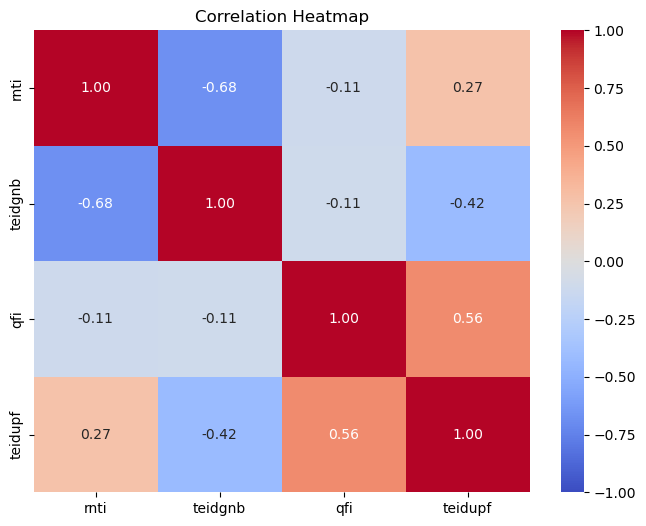

In [124]:
import seaborn as sns

numerical_df = df.select("rnti", "teidgnb", "qfi","teidupf")  

numerical_df_pd = numerical_df.toPandas()

numerical_df_pd = numerical_df_pd.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
correlation_matrix = numerical_df_pd.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

